# History in a git Repository

We are going to see commit activity in a git repository. The dataset comes from JUnit 4, with JQAssistant and the following Cypher query:

```MATCH
   (commit:Git:Commit),
   (commit)-[:CONTAINS_CHANGE]->(change:Git:Change),
   (author:Git:Author)-[:COMMITTED]->(commit),
   (change)-[]->(file:File)
RETURN DISTINCT
   commit.sha AS sha,
   commit.date AS date,
   commit.time AS time,
   commit.author AS author,
   author.email AS author_email,
   author.identString AS author_id,
   commit.committer AS commiter,
   commit.message AS message,
   change.modificationKind AS modificationKind,
   file.fileName AS file```

# Setting Up

In [1]:
import pandas as pd
import calendar
history = pd.read_csv("../datasets/git_history_junit4.gz")

# Exploring Data

In [2]:
history.head()

,sha,date,time,author,author_email,author_id,commiter,message,modificationKind,file
0,3a5c6b4d08f408c8ca6a8e0bae71a9bc5a8f97e8,2020-08-02,20:24:18 +0200,Rahul Nagekar <rahul.nagekar1@gmail.com>,rahul.nagekar1@gmail.com,Rahul Nagekar <rahul.nagekar1@gmail.com>,GitHub <noreply@github.com>,Deprecated since jdk9 replacing constructor in...,NaN,NaN
1,Replacing deprecated datatype constructors,M,src/main/java/junit/framework/Assert.java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44cd8f80dbac11849a42a5d73fc9b5ddc75cd1b4,2016-12-01,21:35:45 +0100,Kevin Cooney <kcooney@google.com>,kcooney@users.noreply.github.com,Kevin Cooney <kcooney@users.noreply.github.com>,Stefan Birkner <github@stefan-birkner.de>,Change generics on ExpectedException.expectCau...,M,src/main/java/org/junit/internal/matchers/Thro...
3,44cd8f80dbac11849a42a5d73fc9b5ddc75cd1b4,2016-12-01,21:35:45 +0100,Kevin Cooney <kcooney@google.com>,kcooney@users.noreply.github.com,Kevin Cooney <kcooney@users.noreply.github.com>,Stefan Birkner <github@stefan-birkner.de>,Change generics on ExpectedException.expectCau...,M,src/main/java/org/junit/rules/ExpectedExceptio...
4,8baae6ecd6e719c8de58bac1a191de2badd78ed3,2016-12-08,19:16:32 +0100,Kevin Cooney <kcooney@google.com>,kcooney@users.noreply.github.com,Kevin Cooney <kcooney@users.noreply.github.com>,Kevin Cooney <kcooney@google.com>,Do not use @Override when implementing methods...,NaN,NaN


## Times Each File was Modified

In [3]:
file_change_count = history["file"]
file_change_count = file_change_count.dropna()
file_change_count = file_change_count.value_counts().rename_axis("file").reset_index(name="changes")
file_change_count = file_change_count.sort_values("file")
file_change_count = file_change_count.set_index("file")
file_change_count.head()

,changes
file,
.bashemtote/tags/-f,1
.bashemtote/tags/first_fail_ensurecommitted,1
.bashemtote/tags/recent_fail_ensurecommitted,1
.classpath,8
.cvsignore,4


### Top Most Changed Files

In [13]:
top_file_change_count = file_change_count.sort_values("changes", ascending=False)
top_file_change_count = top_file_change_count.head(15)
top_file_change_count

,changes
file,
src/test/java/org/junit/tests/AllTests.java,44
src/main/java/org/junit/runners/ParentRunner.java,34
build.xml,31
pom.xml,29
src/main/java/org/junit/rules/ExpectedException.java,26
src/main/java/org/junit/runners/Parameterized.java,25
src/main/java/org/junit/experimental/theories/internal/AllMembersSupplier.java,24
src/main/java/org/junit/runners/BlockJUnit4ClassRunner.java,24
src/main/java/org/junit/Assert.java,23


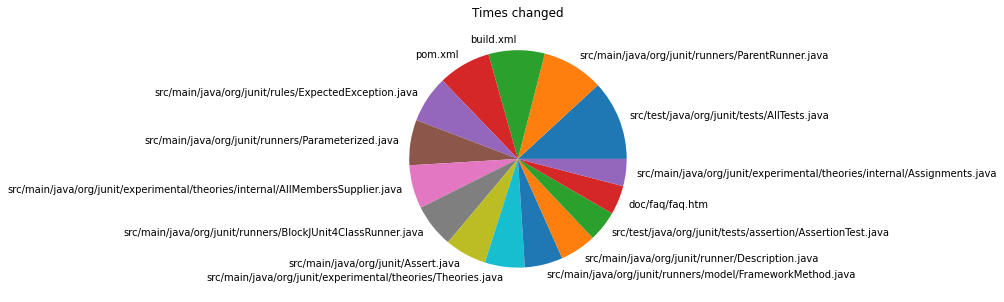

In [14]:
ax = top_file_change_count.plot.pie(y='changes', legend=None, figsize=(5, 5))
ax.set_title("Times changed")
ax.axes.get_xaxis().get_label().set_visible(False)
ax.axes.get_yaxis().get_label().set_visible(False)